# Linear Binary Classification

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display

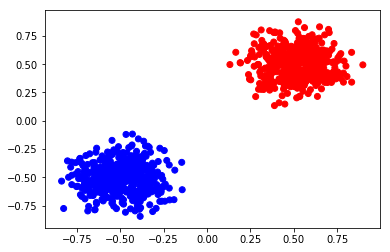

In [4]:
# prepare data
from data import get_2bubbles, get_2bubbles_oblate, get_2bubbles_prolate, get_4bubbles, get_circles

num_data = 500

x_data, y_target = get_2bubbles(num_data)

plt.set_cmap(plt.cm.bwr)
plt.scatter(x_data[:,0], x_data[:,1], c=y_target.ravel())
plt.show()

In [5]:
n_features = x_data.shape[1]
n_class = y_target.shape[1]

print("number of features =", n_features)
print("number of classes  =", n_class)

number of features = 2
number of classes  = 1


In [6]:
# parameters
learning_rate   = 0.3
training_epochs = 10000
err_threshold   = 1.e-6

In [7]:
# placeholders
X = tf.placeholder(tf.float32, shape=(None, n_features), name="x")
Y = tf.placeholder(tf.float32, shape=(None, n_class), name="y")                    

# variables
w = tf.Variable(tf.random_normal(shape=[n_features, n_class]))
b = tf.Variable(tf.random_normal(shape=[n_class]))

# operations
y_model = tf.sigmoid(tf.add(tf.matmul(X, w), b))

# cost Function
loss = tf.reduce_mean( - tf.log(y_model) * Y - tf.log(1 - y_model) * (1 - Y))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [8]:
def plot_decision_boundary():
    plt.figure(figsize=(15, 10))
    # plot decision boundary
    plt.subplot(221)
    xv, yv = np.meshgrid(linsp, linsp)
    zv = y_predict.reshape(xv.shape)
    ics = plt.contourf(xv, yv, zv, zdir='z', offset=0, alpha=0.5)
    #plt.colorbar(ics)
    plt.scatter(x_data[:,0], x_data[:,1], c=y_target.ravel())
    # plot error
    plt.subplot(222)
    plt.plot([x for x in range(epoch+1)], loss_values)
    plt.xlabel("Epoch")
    plt.ylabel("loss function value")
    plt.show()
    
# to plot
off = 0.2
linsp = np.linspace(-1-off, 1+off)
x_predict = np.asarray([np.array([i, j]) for i in linsp for j in linsp])

loss_values = []

Epoch = 2900 - error =  0.003327, diff = 1.058448e-06


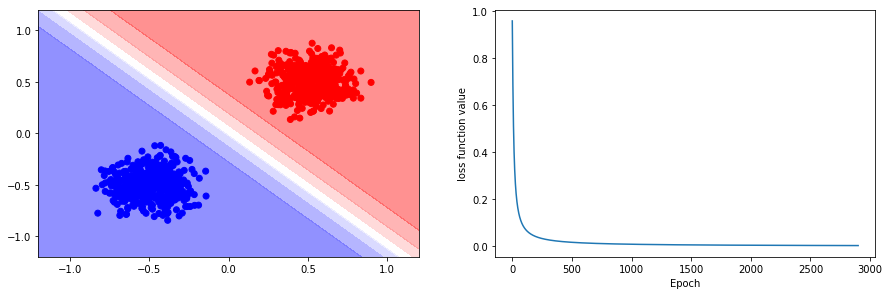

Exit: diff = 9.976793e-07


In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([loss, optimizer], {X: x_data, Y: y_target})

        loss_values.append(err)

        if epoch % 100 == 0:
            # Prediction
            y_predict = sess.run(y_model, {X: x_predict})
            display.clear_output(wait=True)
            print("Epoch = {:2d} - error = {:9.6f}, diff = {:e}".format(epoch, err, abs(err - prev_err)))
            plot_decision_boundary()

        if abs(prev_err - err) < err_threshold:
            print("Exit: diff = {:e}".format(abs(err - prev_err)))
            break

        prev_err = err

    # Prediction
    y_predict = sess.run(y_model, {X: x_predict})